In [57]:
import pandas as pd
import numpy as np
#import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [36]:
data = pd.read_csv(r"C:\Users\ASUS\Downloads\Sleep_Efficiency.csv")
data.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [4]:
data.shape

(452, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [6]:
data.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [7]:
data.Awakenings.value_counts()

Awakenings
1.0    154
0.0     95
3.0     63
4.0     63
2.0     57
Name: count, dtype: int64

In [8]:
awakenings_frequent_category = data.Awakenings.mode()
awakenings_frequent_category

0    1.0
Name: Awakenings, dtype: float64

In [9]:
data.Awakenings.fillna(1, inplace = True)

In [10]:
data.Awakenings.isna().sum()

0

In [11]:
data['Caffeine consumption'].value_counts()

Caffeine consumption
0.0      211
50.0     107
25.0      79
75.0      25
200.0      4
100.0      1
Name: count, dtype: int64

In [12]:
caffeine_consumption_frequent_category = data['Caffeine consumption'].mode()
caffeine_consumption_frequent_category

0    0.0
Name: Caffeine consumption, dtype: float64

In [13]:
data['Caffeine consumption'].fillna(0, inplace = True)

In [15]:
data['Caffeine consumption'].isna().sum()

0

In [16]:
data['Alcohol consumption'].isnull().sum()

14

In [17]:
data['Alcohol consumption'].value_counts()

Alcohol consumption
0.0    246
1.0     54
3.0     48
2.0     37
5.0     30
4.0     23
Name: count, dtype: int64

In [18]:
alcohol_consumption_frequent_category=data['Alcohol consumption'].mode()
alcohol_consumption_frequent_category

0    0.0
Name: Alcohol consumption, dtype: float64

In [19]:
data['Alcohol consumption'].fillna(0,inplace=True)

In [20]:
data['Alcohol consumption'].isnull().sum()

0

In [21]:
data['Exercise frequency'].isnull().sum()

6

In [22]:
data['Exercise frequency'].value_counts()

Exercise frequency
3.0    130
0.0    116
1.0     97
2.0     54
4.0     41
5.0      8
Name: count, dtype: int64

In [23]:
exercise_frequency_frequent_category=data['Exercise frequency'].mode()
exercise_frequency_frequent_category

0    3.0
Name: Exercise frequency, dtype: float64

In [24]:
data['Exercise frequency'].fillna(3,inplace=True)

In [25]:
data['Exercise frequency'].isnull().sum()

0

In [26]:
data.duplicated().sum()

0

In [27]:
data

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,0.0,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


In [28]:
data['Bedtime']=pd.to_datetime(data['Bedtime'])
data['Wakeup time']=pd.to_datetime(data['Wakeup time'])

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      452 non-null    int64         
 1   Age                     452 non-null    int64         
 2   Gender                  452 non-null    object        
 3   Bedtime                 452 non-null    datetime64[ns]
 4   Wakeup time             452 non-null    datetime64[ns]
 5   Sleep duration          452 non-null    float64       
 6   Sleep efficiency        452 non-null    float64       
 7   REM sleep percentage    452 non-null    int64         
 8   Deep sleep percentage   452 non-null    int64         
 9   Light sleep percentage  452 non-null    int64         
 10  Awakenings              452 non-null    float64       
 11  Caffeine consumption    452 non-null    float64       
 12  Alcohol consumption     452 non-null    float64   

In [30]:
data

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,0.0,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


In [69]:
def agegroup(x):
    if x > 0 and x <= 12:
        return 'Kid'
    elif x > 12 and x <= 18:
        return 'Teenager'
    elif x > 18 and x <= 30:
        return 'Young Adult'
    elif x > 30 and x <= 40:
        return 'Adult'
    elif x > 40 and x <= 60:
        return 'Middle'
    else:
        return 'Senior'

data['Agegroup'] = data['Age'].apply(agegroup)

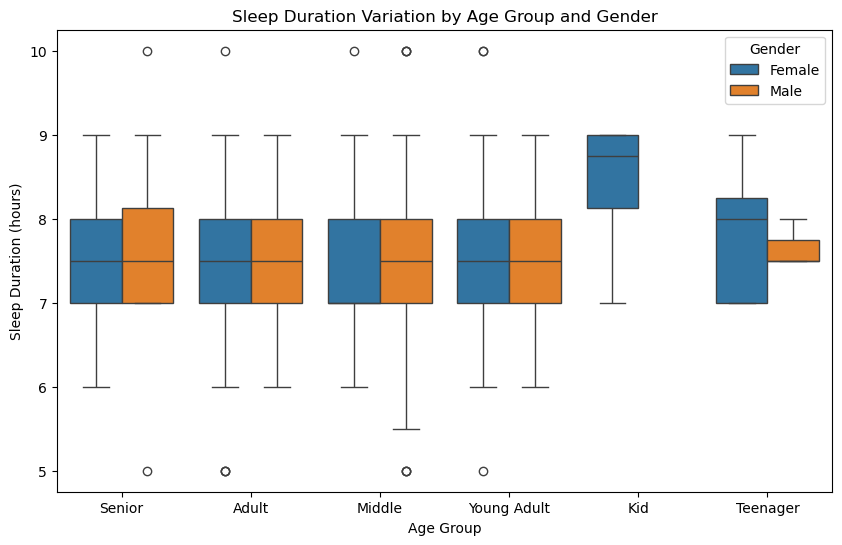

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Agegroup", y="Sleep duration", hue="Gender", data=data)
plt.title('Sleep Duration Variation by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Sleep Duration (hours)')
plt.show()

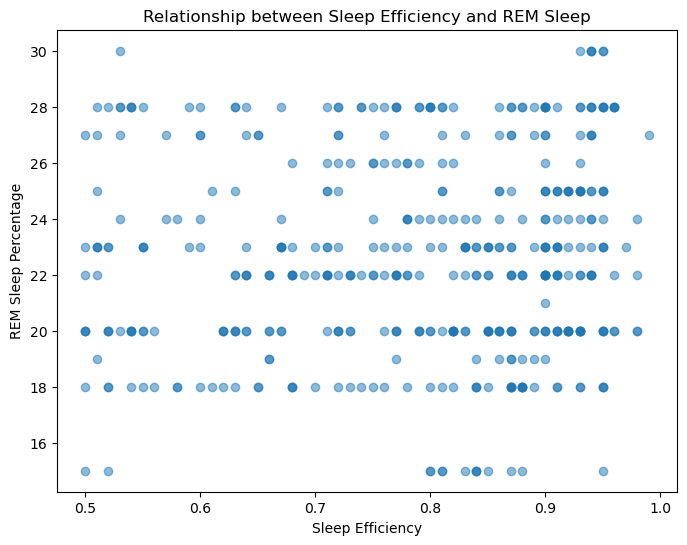

In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Sleep efficiency'], data['REM sleep percentage'], alpha=0.5)
plt.title('Relationship between Sleep Efficiency and REM Sleep')
plt.xlabel('Sleep Efficiency')
plt.ylabel('REM Sleep Percentage')


plt.show()

In [49]:
correlation_coef = np.corrcoef(data['Sleep efficiency'],data['REM sleep percentage'] )[0, 1]
print("Correlation Coefficient:", correlation_coef)data['Bedtime'] = pd.to_datetime(data['Bedtime'], errors='coerce')

Correlation Coefficient: 0.06236245443354684


In [53]:
data['Bedtime'] = pd.to_datetime(data['Bedtime'], errors='coerce')
data['bedtime_hours']=data['Bedtime'].dt.hour
data
def change_bedtime(x):
    if x==0:
        return 12
    elif x<12:
        return x
    elif x>12:
        return x-12
data['bedtime_hours']=data['bedtime_hours'].apply(change_bedtime)

In [54]:
data['bedtime_hours'].value_counts()

bedtime_hours
12    110
10     83
9      73
1      67
2      64
11     55
Name: count, dtype: int64

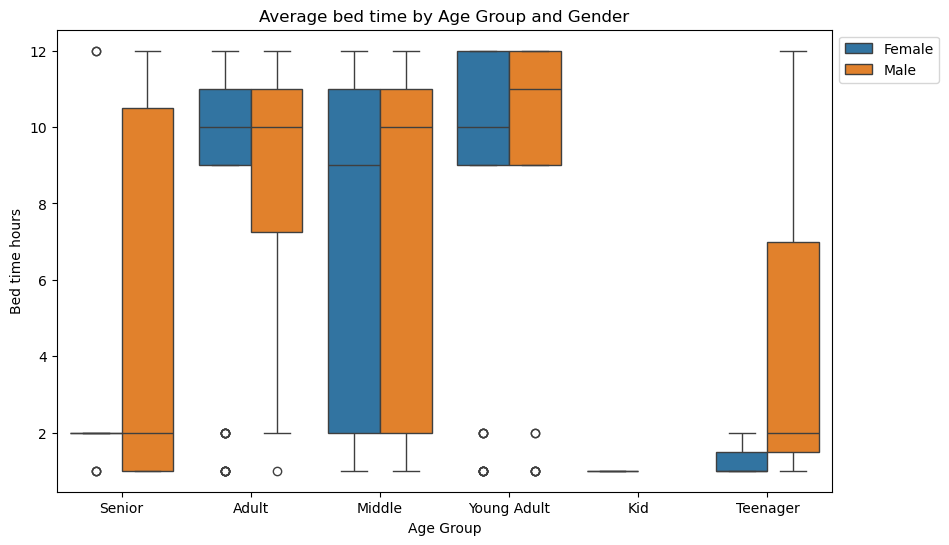

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Agegroup", y="bedtime_hours", hue="Gender", data=data)
plt.title('Average bed time by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Bed time hours')


plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

In [61]:
data['Wakeup time'] = pd.to_datetime(data['Wakeup time'], errors='coerce')
data['wakeuptime_hours']=data['Wakeup time'].dt.hour
data

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,bedtime_hours,wakeuptime_hours
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,1,7
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,2,9
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,9,5
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0,2,8
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0,10,5
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0,9,3
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0,11,7
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0,9,4


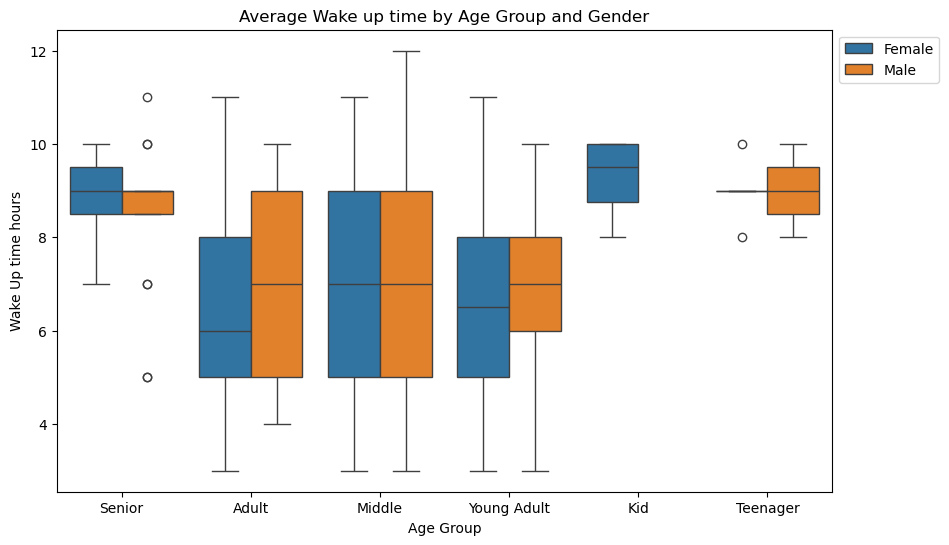

In [72]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Agegroup", y="wakeuptime_hours", hue="Gender", data=data)
plt.title('Average Wake up time by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Wake Up time hours')


plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

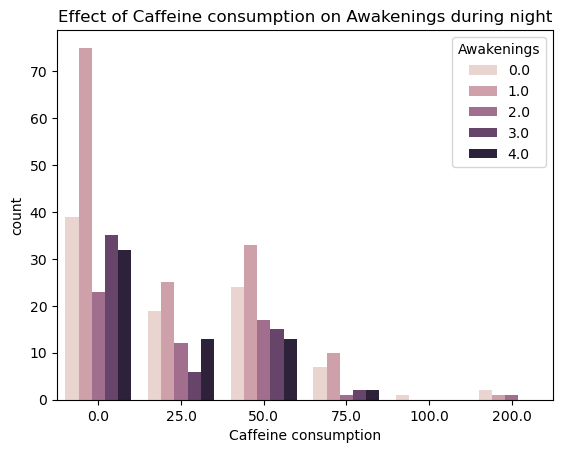

In [63]:
sns.countplot(x=data['Caffeine consumption'],hue=data['Awakenings'])
plt.title('Effect of Caffeine consumption on Awakenings during night')
plt.show()

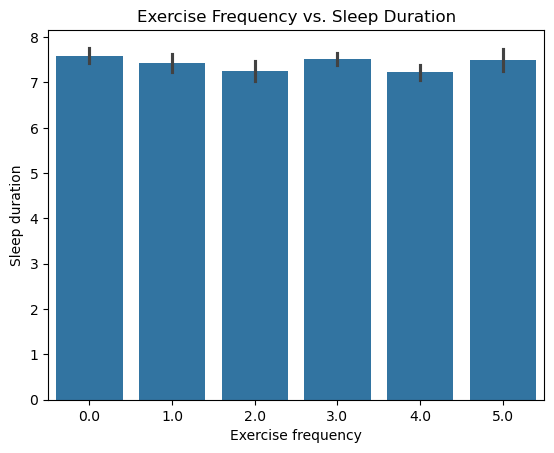

In [64]:
sns.barplot(x='Exercise frequency', y='Sleep duration', data=data)
plt.title('Exercise Frequency vs. Sleep Duration')
plt.show()

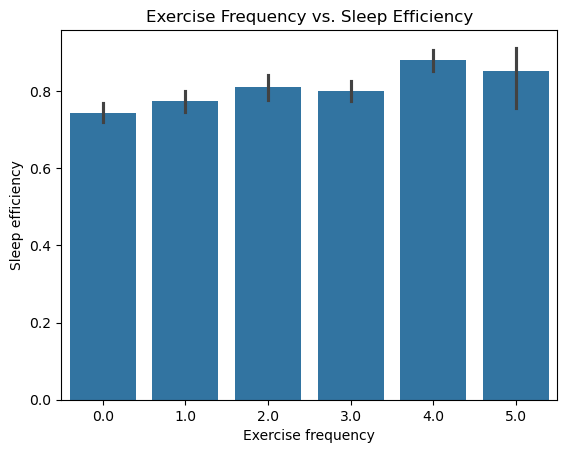

In [65]:
sns.barplot(x='Exercise frequency', y=data['Sleep efficiency'], data=data)
plt.title('Exercise Frequency vs. Sleep Efficiency')
plt.show()

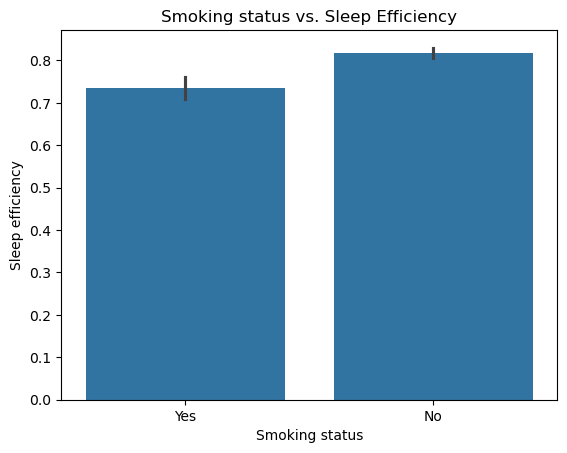

In [66]:
sns.barplot(x='Smoking status', y=data['Sleep efficiency'], data=data)
plt.title('Smoking status vs. Sleep Efficiency')
plt.show()

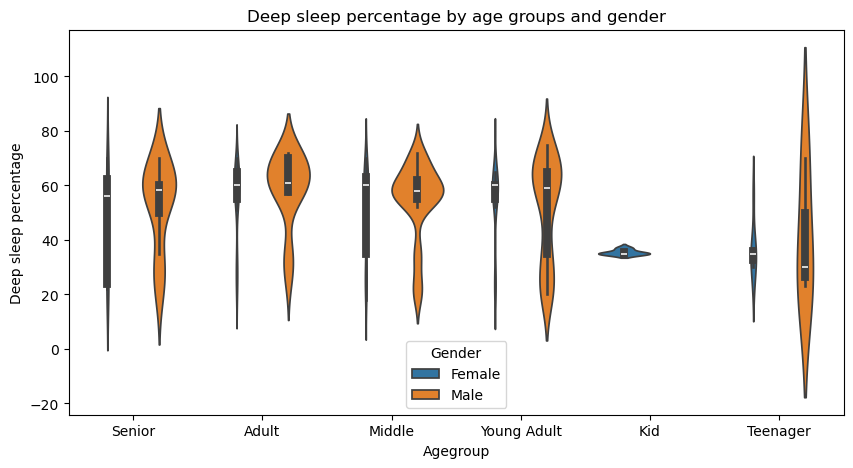

In [75]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Agegroup',y='Deep sleep percentage',hue='Gender',data=data)
plt.title('Deep sleep percentage by age groups and gender')
plt.show()

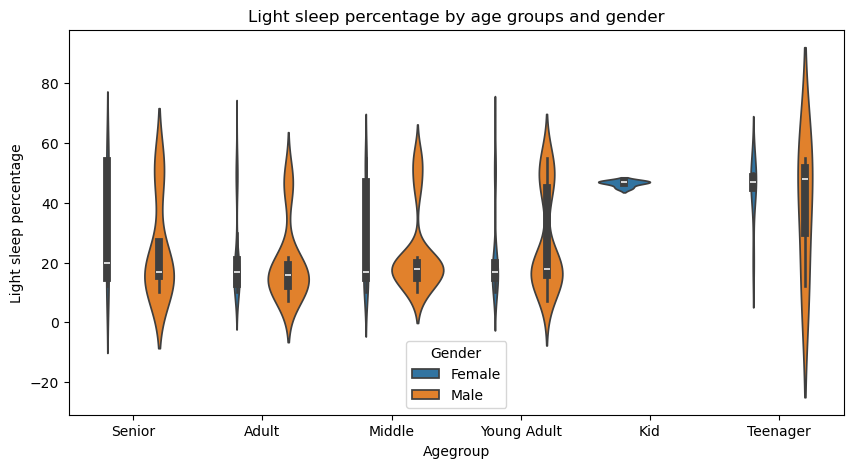

In [76]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Agegroup',y='Light sleep percentage',hue='Gender',data=data)
plt.title('Light sleep percentage by age groups and gender')
plt.show()

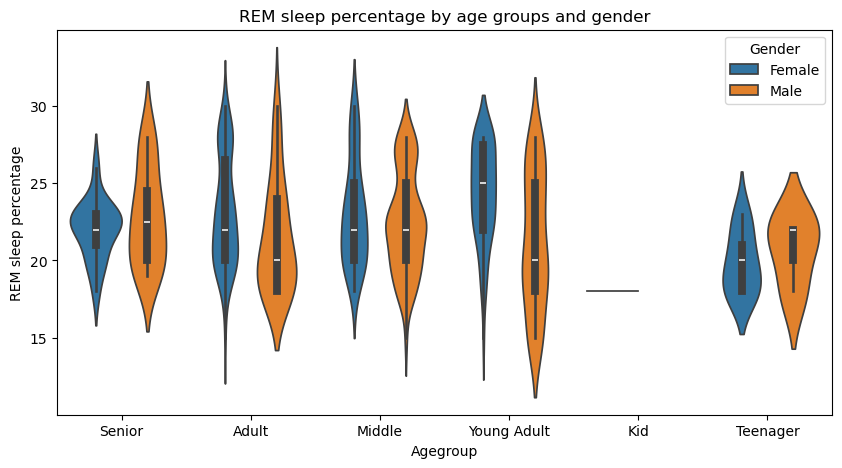

In [77]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Agegroup',y='REM sleep percentage',hue='Gender',data=data)
plt.title('REM sleep percentage by age groups and gender')
plt.show()

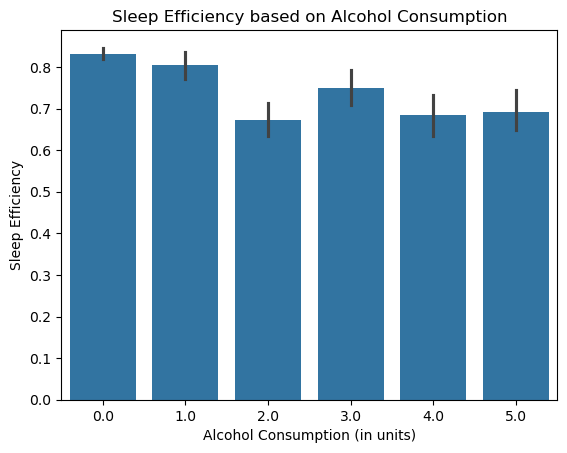

In [80]:
sns.barplot(x='Alcohol consumption', y='Sleep efficiency', data=data)
plt.title('Sleep Efficiency based on Alcohol Consumption')
plt.xlabel('Alcohol Consumption (in units)')
plt.ylabel('Sleep Efficiency')
plt.show()